In [6]:
import iris
import iris.coord_categorisation
import cf_units
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [7]:
directory = '/data/NAS-geo01/ph290/misc_data/cmip6_forcing/'
ssp585 = 'mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_ScenarioMIP_UoM-REMIND-MAGPIE-ssp585-1-2-0_gr1-GMNHSH_2015-2500.nc'
historical = 'mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc'

In [8]:
hist_cube = iris.load_cube(directory+historical)
ssp585_cube = iris.load_cube(directory+ssp585)

Correcting for The fact that the dates in the netcdf file start with a reference date which does not exist (day 0 of the gregorian claendar)
instead referencing to day 1 and subtracting 1 from each day number

In [9]:
coord = hist_cube.coord('time')

units = "days since 0001-01-01 00:00:00"

hist_years = [cf_units.num2date(x, units, cf_units.CALENDAR_GREGORIAN).year for x in coord.points-1]
hist_months = [cf_units.num2date(x, units, cf_units.CALENDAR_GREGORIAN).month for x in coord.points-1]

In [10]:
coord = ssp585_cube.coord('time')

units = "days since 1850-01-01 00:00:00"

ssp585_years = [cf_units.num2date(x, units, cf_units.CALENDAR_365_DAY).year for x in coord.points-1]
ssp585_months = [cf_units.num2date(x, units, cf_units.CALENDAR_365_DAY).month for x in coord.points-1]
# days since 1850-01-01 00:00:00', calendar='365_day'


In [11]:
co2 = np.concatenate((hist_cube[:,0].data,ssp585_cube[:,0].data))

In [12]:
years = np.concatenate((hist_years,ssp585_years)).astype(float)
years += 0.5


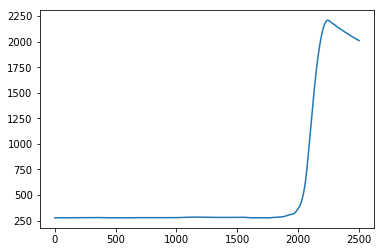

In [13]:
plt.plot(years,co2)

In [14]:
df = pd.DataFrame(columns=['year','atm_co2'])
df.year = years
df.atm_co2 = co2
df.to_csv(directory+'/hist_and_ssp585_atm_co2.dat',index=False,header=False,sep=' ')


